In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/comm

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdrakibulhassan111","key":"0ccedab8c2a52cbaab3d32e76ee260b1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d msambare/fer2013

 78% 47.0M/60.3M [00:01<00:00, 28.8MB/s]
100% 60.3M/60.3M [00:01<00:00, 44.5MB/s]


In [ ]:
!ls

fer2013.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
file_name = "fer2013.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

In [ ]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

In [ ]:
emotion_model = Sequential()
emotion_model.add(base_model)
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(48,48,3), data_format='channels_last'))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same',))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same',))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))



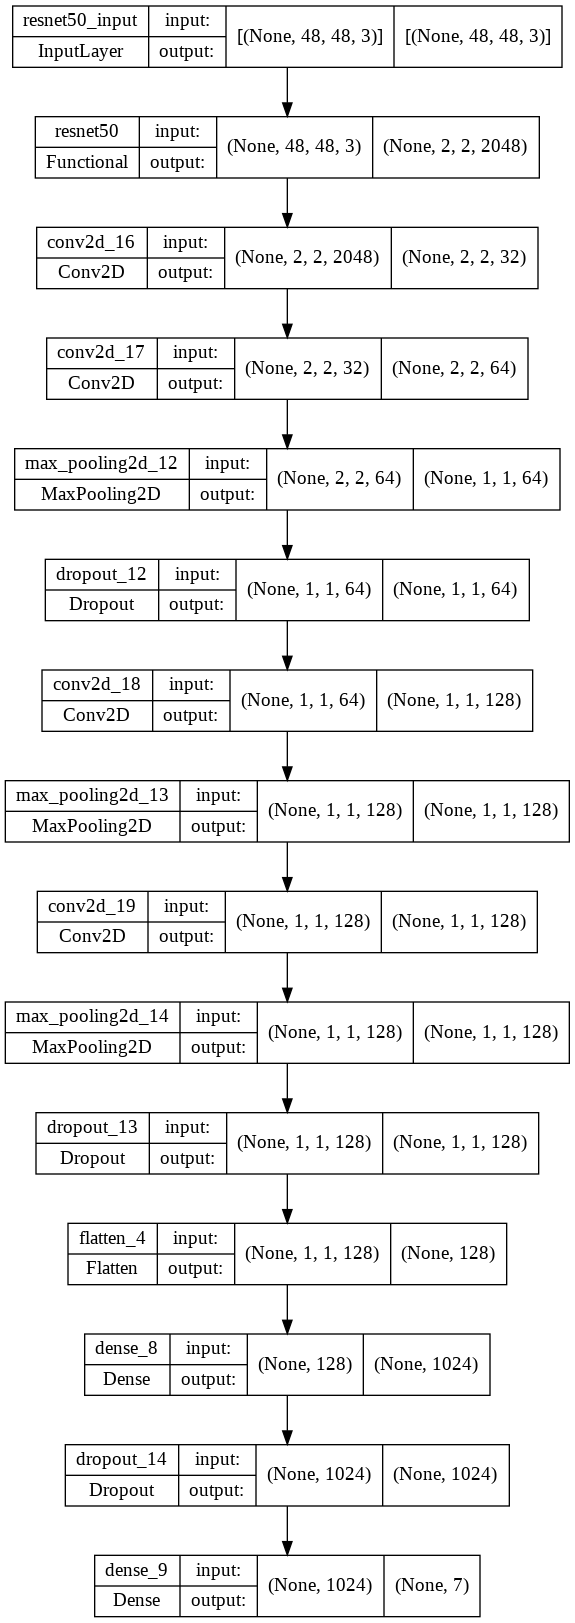

In [ ]:
plot_model(emotion_model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
emotion_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 conv2d_16 (Conv2D)          (None, 2, 2, 32)          589856    
                                                                 
 conv2d_17 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 1, 1, 64)          0         
                                                                 
 conv2d_18 (Conv2D)          (None, 1, 1, 128)         73856     
                                                      

In [ ]:
emotion_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=35,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/35


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


448/448 [==============================] - 119s 233ms/step - loss: 0.0231 - accuracy: 0.9767 - val_loss: 0.6335 - val_accuracy: 0.6025
Epoch 2/35
448/448 [==============================] - 103s 230ms/step - loss: 0.0241 - accuracy: 0.9773 - val_loss: 0.6025 - val_accuracy: 0.6106
Epoch 3/35
448/448 [==============================] - 103s 229ms/step - loss: 0.0203 - accuracy: 0.9795 - val_loss: 0.7338 - val_accuracy: 0.6159
Epoch 4/35
448/448 [==============================] - 107s 239ms/step - loss: 0.0208 - accuracy: 0.9791 - val_loss: 1.1260 - val_accuracy: 0.6110
Epoch 5/35
448/448 [==============================] - 103s 230ms/step - loss: 0.0206 - accuracy: 0.9793 - val_loss: 1.2111 - val_accuracy: 0.5953
Epoch 6/35
448/448 [==============================] - 102s 229ms/step - loss: 0.0218 - accuracy: 0.9807 - val_loss: 0.8471 - val_accuracy: 0.6164
Epoch 7/35
448/448 [==============================] - 103s 229ms/step - loss: 0.0220 - accuracy: 0.9814 - val_loss: 0.7189 - val_accura

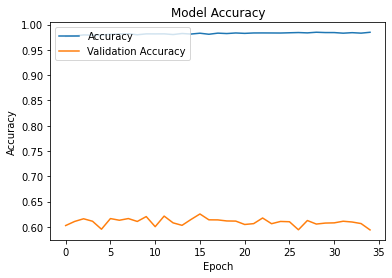

In [ ]:
from matplotlib import pyplot as plt
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["Accuracy","Validation Accuracy"],loc='upper left')
plt.show()

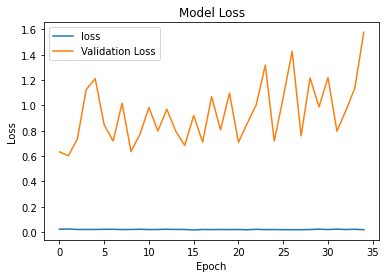

In [ ]:
from matplotlib import pyplot as plt
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["loss","Validation Loss"],loc='upper left')
plt.show()

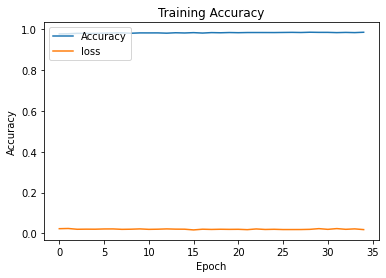

In [ ]:
from matplotlib import pyplot as plt
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['loss'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["Accuracy","loss"],loc='upper left')
plt.show()


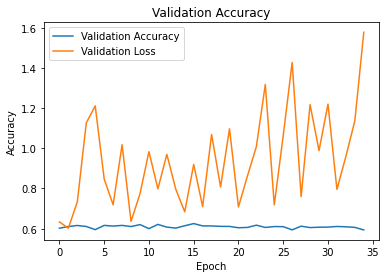

In [ ]:
from matplotlib import pyplot as plt
plt.plot(emotion_model_info.history['val_accuracy'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["Validation Accuracy","Validation Loss"],loc='upper left')
plt.show()

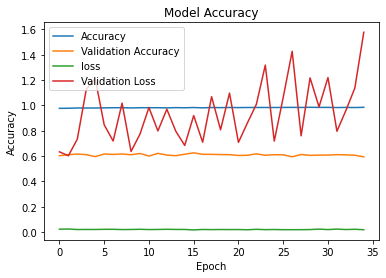

In [ ]:
from matplotlib import pyplot as plt
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"],loc='upper left')
plt.show()


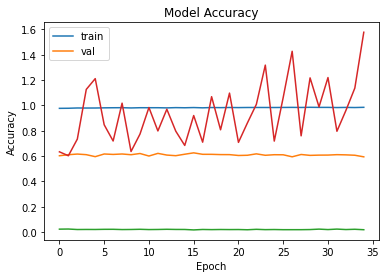

In [ ]:
from matplotlib import pyplot as plt
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [ ]:
#Saving the model
emotion_model.save('faceemotionmodel.h5')

In [ ]:
from keras.models import load_model
emotion_model = load_model('faceemotionmodel.h5')

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [ ]:


from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

In [ ]:
import cv2
            
def facecrop(image):  
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('photo.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()

OpenCV(4.1.2) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'



ResourceExhaustedError: ignored